<a href="https://colab.research.google.com/github/kylemccullough1/MachineLearning/blob/main/Assignment_4_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Load all the data
dataset = pd.ExcelFile("/content/drive/MyDrive/Assignment_4/Asssignment4_Data.xlsx")
# I renamed the sheets to be Train and Test
train_data = pd.read_excel(dataset, 'Train')
test_data = pd.read_excel(dataset, 'Test')
train_data, test_data = train_data.drop(columns=['House ID']), test_data.drop(columns=['House ID'])
# Cleaning data to make it easier for computations
train_data['Local Price'] = train_data['Local Price'].apply(lambda x: round(x))
train_data['Living area'] = train_data['Living area'].apply(lambda x: round(x))
train_data['Land Area'] = train_data['Land Area'].apply(lambda x: round(x))
train_data['Age of home'] = train_data['Age of home'].apply(lambda x: x - (x % 10))
train_data

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,5,1.0,3,1,1.0,7,4,40,Apartment
1,5,1.0,4,2,2.0,7,4,60,House
2,5,1.0,2,1,1.0,6,3,40,Condo
3,5,1.0,4,1,1.0,6,3,50,Apartment
4,5,1.0,4,1,1.0,6,3,40,Apartment
5,4,1.0,4,1,1.0,6,3,50,Condo
6,6,1.0,6,1,1.0,7,3,50,Condo
7,6,1.0,10,2,0.0,6,3,30,House
8,16,2.5,10,3,2.0,10,5,40,Condo
9,14,2.5,13,3,2.0,9,5,10,Apartment


In [37]:
X_train = train_data.drop([train_data.columns[-1]], axis = 1)
y_train = train_data[train_data.columns[-1]]
X_test = test_data.drop([test_data.columns[-1]], axis = 1)
y_test = test_data[test_data.columns[-1]]
y_test

0    Apartment
1        House
2        House
3    Apartment
4    Apartment
Name: Construction type, dtype: object

Training accuracy 1.0
Test accuracy 0.4


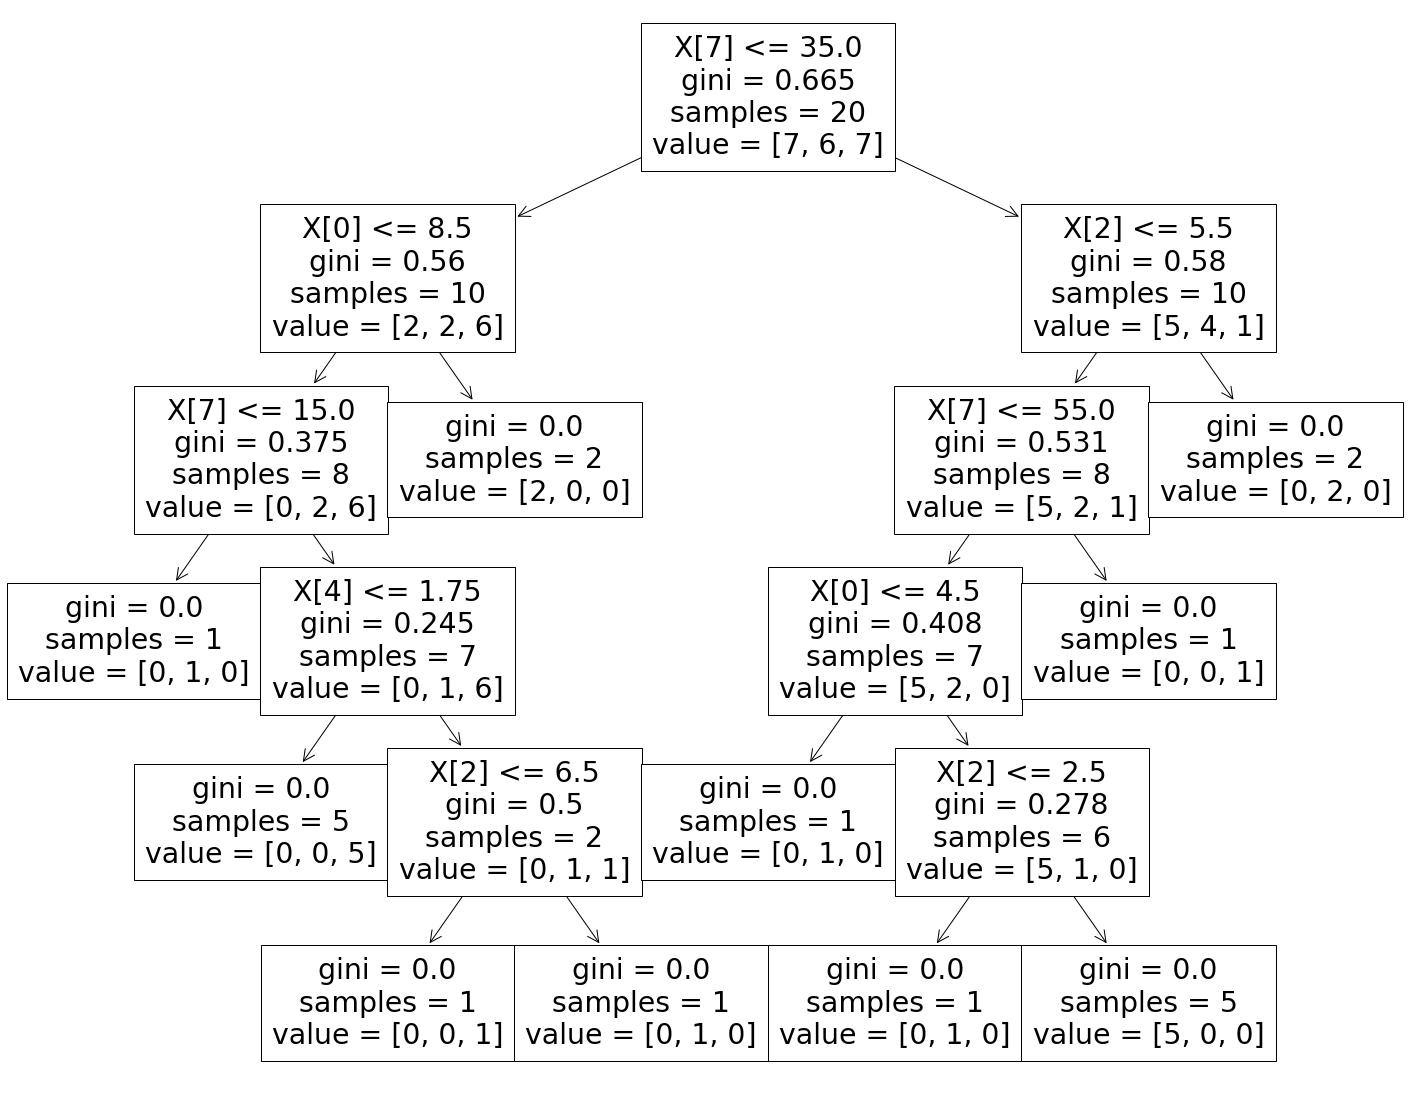

In [64]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train.values, y_train.values)
y_train_predict = []
for x in range(X_train.shape[0]):
  y_train_predict.append(clf.predict([X_train.iloc[x]])[0])
y_test_predict = []
for x in range(X_test.shape[0]):
  y_test_predict.append(clf.predict([X_test.iloc[x]])[0])

print('Training accuracy', accuracy_score(y_train_predict, y_train))
print('Test accuracy', accuracy_score(y_test_predict, y_test))
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf)

In [60]:
clf = tree.DecisionTreeClassifier(max_depth=.5)
clf = clf.fit(X_train.values, y_train.values)
y_train_predict = []
for x in range(X_train.shape[0]):
  y_train_predict.append(clf.predict([X_train.iloc[x]])[0])
y_test_predict = []
for x in range(X_test.shape[0]):
  y_test_predict.append(clf.predict([X_test.iloc[x]])[0])

print('Training accuracy', accuracy_score(y_train_predict, y_train))
print('Test accuracy', accuracy_score(y_test_predict, y_test))

clf = tree.DecisionTreeClassifier(max_depth=1000)
clf = clf.fit(X_train.values, y_train.values)
y_train_predict = []
for x in range(X_train.shape[0]):
  y_train_predict.append(clf.predict([X_train.iloc[x]])[0])
y_test_predict = []
for x in range(X_test.shape[0]):
  y_test_predict.append(clf.predict([X_test.iloc[x]])[0])

print('Training accuracy', accuracy_score(y_train_predict, y_train))
print('Test accuracy', accuracy_score(y_test_predict, y_test))

clf = tree.DecisionTreeClassifier(max_depth=100)
clf = clf.fit(X_train.values, y_train.values)
y_train_predict = []
for x in range(X_train.shape[0]):
  y_train_predict.append(clf.predict([X_train.iloc[x]])[0])
y_test_predict = []
for x in range(X_test.shape[0]):
  y_test_predict.append(clf.predict([X_test.iloc[x]])[0])

print('Training accuracy', accuracy_score(y_train_predict, y_train))
print('Test accuracy', accuracy_score(y_test_predict, y_test))

Training accuracy 0.35
Test accuracy 0.6
Training accuracy 1.0
Test accuracy 0.4
Training accuracy 1.0
Test accuracy 0.4


1. Using default parameters, the training accuracy is 1.0 and the test accuracy is .4
2. It seemed that the lower depth decreased training accuracy but increased test accuracy slightly.
3. Having a deeper depth allows for more complexity but also allows for overfitting of the data, causing training accuracy to be high while also having a lower test accuracy. A more shallow depth can allow for less overfitting.
4. Based on the tree, I would say the given example is an Apartment.